Girdi özellikleri sırayla:
1) CRIM: şehre göre kişi başına düşen suç oranı
2) ZN: 25.000 metrekarenin üzerindeki arsalar için imarlı konut arazilerinin oranı.
3) INDUS: şehir başına perakende olmayan iş alanlarının oranı
4) CHAS: Charles Nehri kukla değişkeni (yol nehir sınırındaysa 1; aksi takdirde 0)
5) NOX: nitrik oksit konsantrasyonu (10 milyonda parça) [parça/10M]
6) RM: konut başına ortalama oda sayısı
7) YAŞ: 1940'tan önce inşa edilmiş ev sahibi tarafından kullanılan birimlerin oranı
8) DIS: Boston'daki beş istihdam merkezine ağırlıklı mesafeler
9) RAD: radyal otoyollara erişilebilirlik endeksi
10) VERGİ: 10.000 $ başına tam değerli emlak vergisi oranı [$/10k]
11) PTRATIO: şehre göre öğrenci-öğretmen oranı
12) B: B=1000(Bk - 0,63)^2 denkleminin sonucudur; burada Bk şehirlere göre siyahların oranıdır
13) LSTAT: Nüfusun % alt statüsü

Çıktı değişkeni:
1) MEDV: Sahibi tarafından kullanılan evlerin 1000 $ cinsinden medyan değeri [k$]

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.express as px
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [59]:
data = pd.read_csv("boston.csv",delimiter=",")
data.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313.0,17.3,396.90,5.77,24.7
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04,23.6


In [60]:
data.shape

(506, 14)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [62]:
#  boş sutunları kontrol etme
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [63]:
#her sutunda kaç farklı değeri sorgulama
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [64]:
#Her bir sutunun grafiğini ve çarpıklığına bakma

skew_val = data.skew().sort_values(ascending=False)
skew_val

CRIM       5.223149
CHAS       3.405904
ZN         2.225666
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64

Her bir sutunun sınır çizgilerini görme

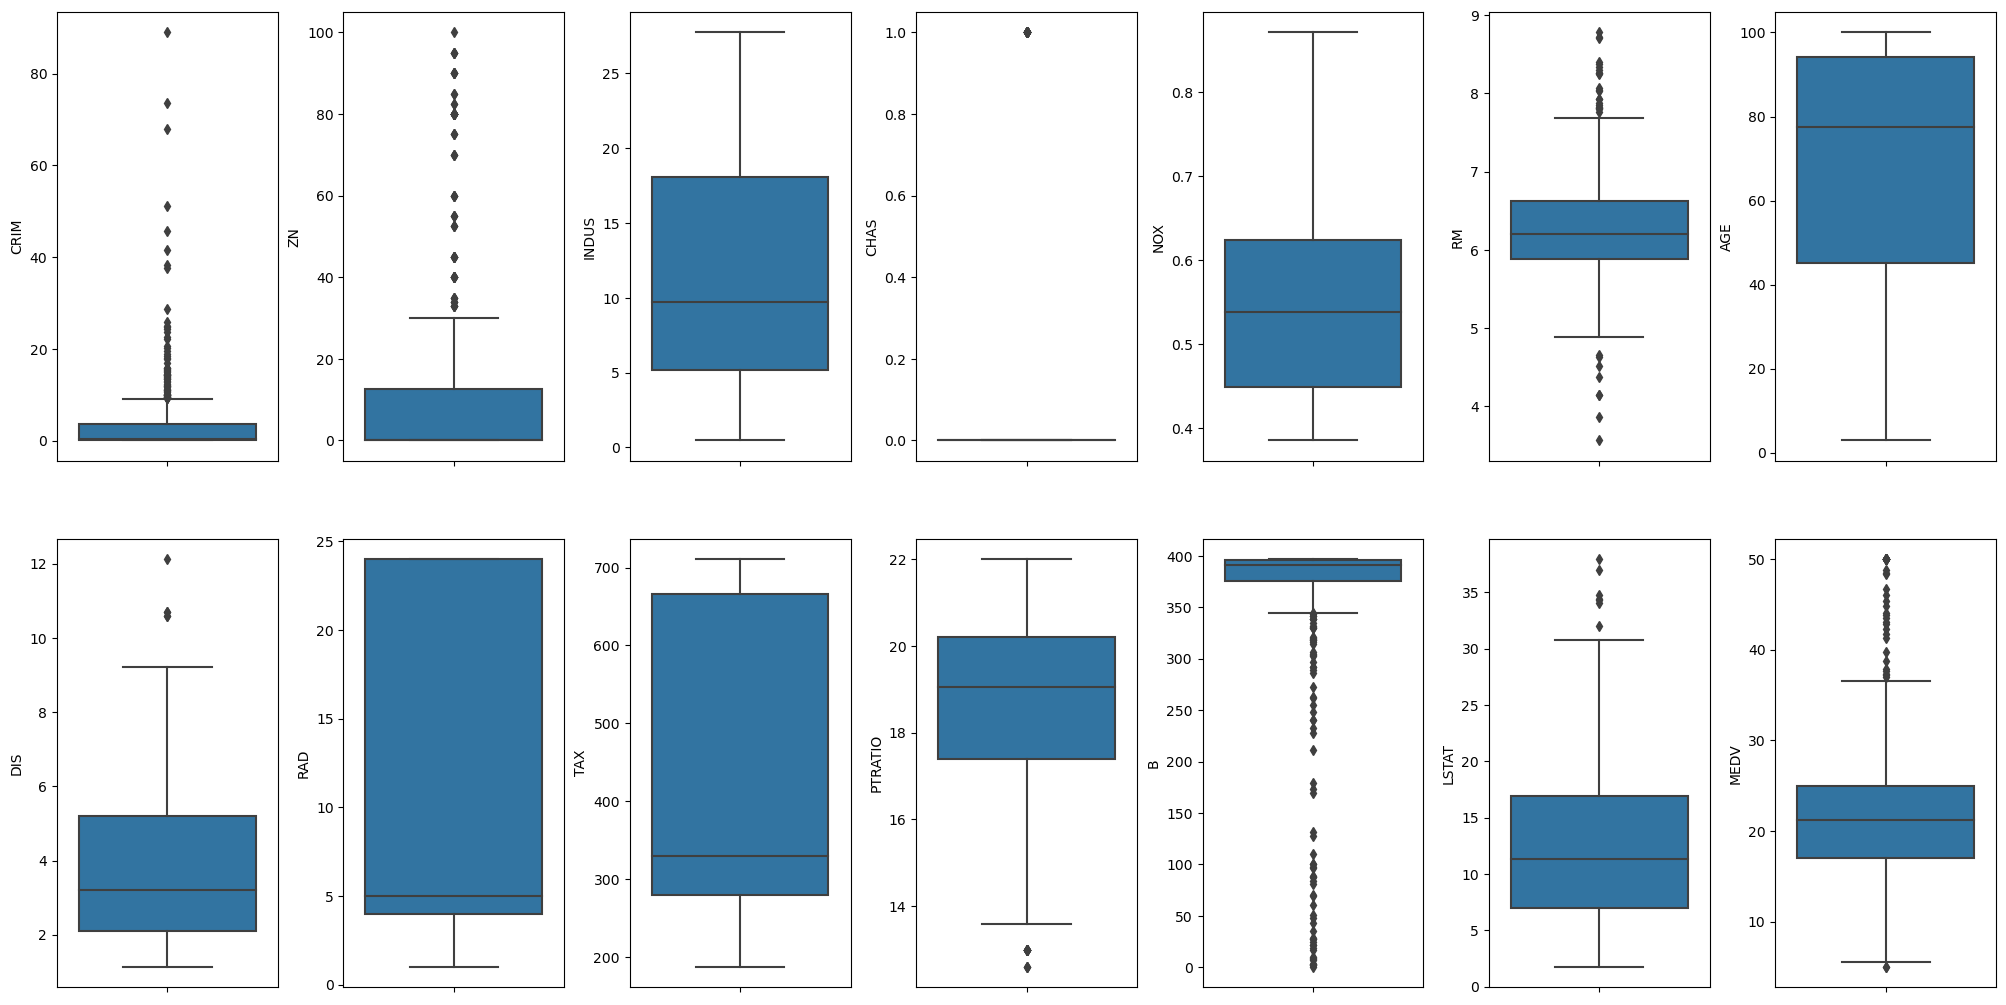

In [65]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

Bivariable Analysis 

In [66]:
fig = px.box(data, x="CHAS", y="MEDV", color="CHAS", width=800, height=400)
fig.show()

In [67]:
fig = px.box(data, x="RAD", y="MEDV", color="RAD")
fig.show()

<AxesSubplot:>

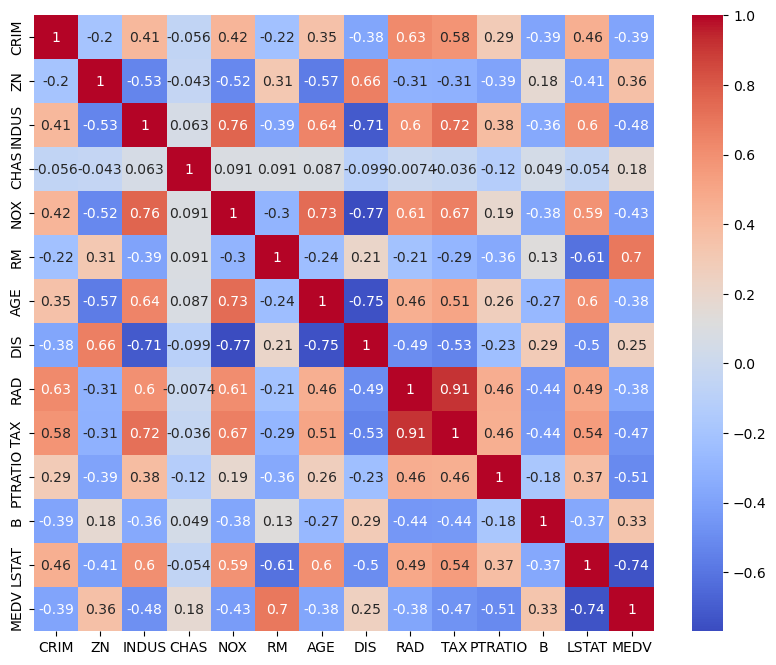

In [68]:
#Korelasyon
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

In [69]:
#Öznitelik seçimleri ve Target'ın belirlenmesi

X=data.iloc[:,:12]
y=data.iloc[:,-1:]

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 12), (127, 12), (379, 1), (127, 1))

Model'i çağırma

In [71]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [72]:
#Tahmin yapmak

y_pred = regressor.predict(X_test)

Regression Metrikleri

In [73]:
#MSE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_test, y_pred=y_pred)

3.1778765305867256

In [74]:
#R2 skoru
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6255290715591726

Değişken Seçimi (p-value)-- Modelin Optimize Edilmesi

In [75]:
import statsmodels.api as sm
X_opt = X
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

In [76]:
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              846.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                   2.38e-320
Time:                        14:43:40   Log-Likelihood:                         -1556.1
No. Observations:                 506   AIC:                                      3136.
Df Residuals:                     494   BIC:                                      3187.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1439      0.036     -3.990      0.000      -0.215      -0.073
ZN             0.0413      0.015      2.696      0.007       0.011       0.071
INDUS         -0.0370      0.068     -0.540      0.589      -0.172       0.098
CHAS           3.2525      0.961      3.384      0.001       1.364       5.141
NOX          -10.8653      3.422     -3.175      0.002     -17.590      -4.141
RM             7.1436      0.289     24.734      0.000       6.576       7.711
AGE           -0.0449      0.014     -3.235      0.001      -0.072      -0.018
DIS           -1.2292      0.206     -5.980      0.000      -1.633      -0.825
RAD            0.2008      0.071      2.829      0.005       0.061       0.340
TAX           -0.0100      0.004     -2.391      0.017      -0.018      -0.002
PTRATIO       -0.6575      0.112     -5.881      0.000      -0.877      -0.438
B              0.0165      0.003      5.779      0.000       0.011       0.022
==============================================================================
Omnibus:                      277.013   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3084.310
Skew:                           2.148   Prob(JB):                         0.00
Kurtosis:                      14.307   Cond. No.                     8.13e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#Örneğin INDUS değeri  p-value 0.589'dir. Bunu veri setinden çıkarıp, tüm değişkenlerin p <= 0.05 olana kadar deneyin.